1.Use the Adult Income dataset to predict whether income exceeds
2.50K yr based oncensus data.
3.Feature Engineering for better decision making by a model
4.Doing Cross Validation to see if the model is overfitting 
and whether results are somewhat constant
5.Gaining confidence in the model using metrics such as Accuracy,Precision,Recall,F1-Score,AUC

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [139]:
##load the data
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [140]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [141]:
df.isnull().sum()## however they are noticeable ? in the data set

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [142]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [143]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [144]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

In [146]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

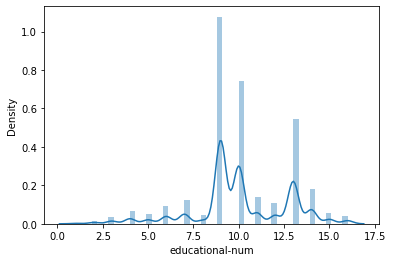

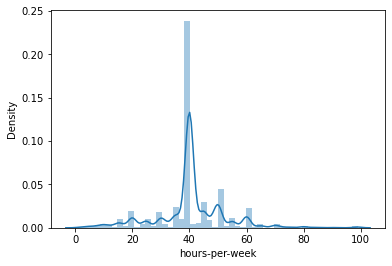

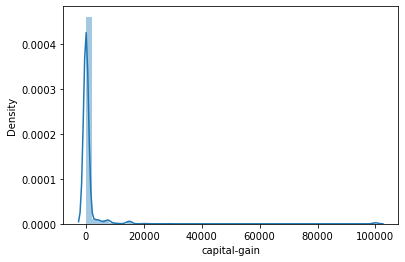

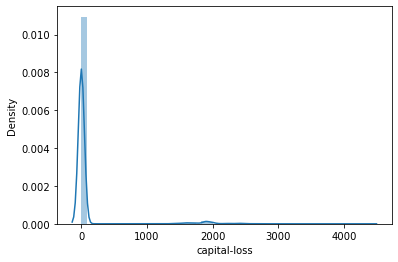

In [149]:
columns=['educational-num','hours-per-week','capital-gain','capital-loss']
for i in columns:
    plt.figure()
    sns.distplot(df[i])


<AxesSubplot:xlabel='income', ylabel='count'>

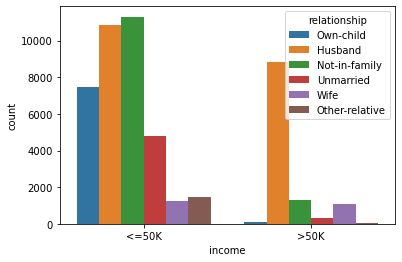

In [98]:
## relationship and race in terms of income
sns.countplot(df['income'],hue='relationship',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

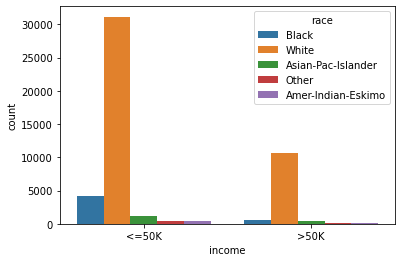

In [99]:

sns.countplot(df['income'],hue='race',data=df)

from the data, men are paid more than women, the white race is the highest paid, the husband is the highest paid in terms of a relationship.


# filling the ? values

In [100]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native-country']=df['native-country'].replace('?','United-States')

In [101]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


# Feature engineering

In [102]:
## education replace lower primary with school


In [103]:
df.education=df.education.replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th'],'school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm'],'higher')
df.education=df.education.replace(['HS-grad'],'high school')
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Married-spouse-absent','Widowed'],'other')

In [104]:
#INCOME
df.income=df.income.replace('<=50K',0)
df.income=df.income.replace('>50K',1)

In [105]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [106]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

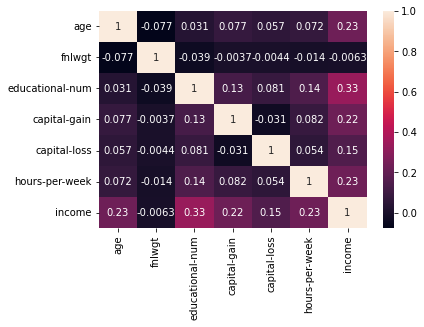

In [107]:
sns.heatmap(df.corr(),annot=True)

# histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

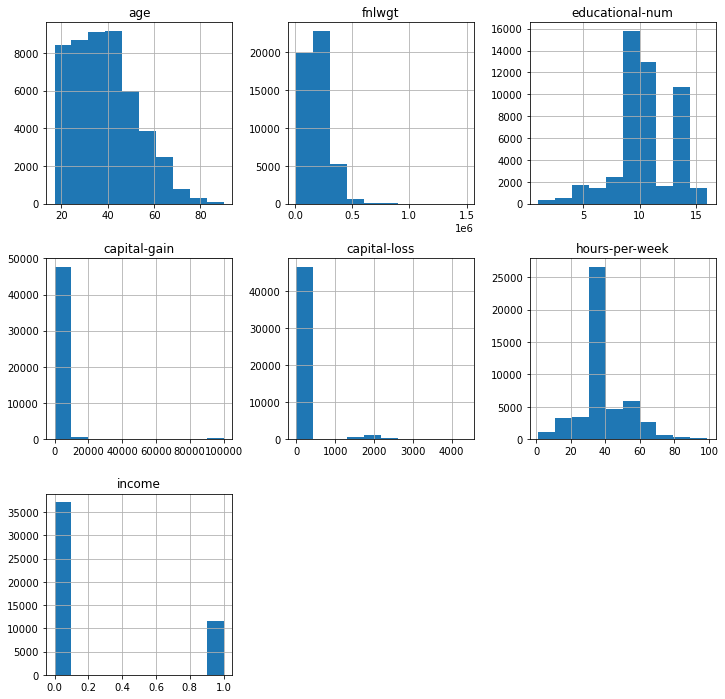

In [108]:
df.hist(figsize=(12,12),sharex=False,layout=(3,3))

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

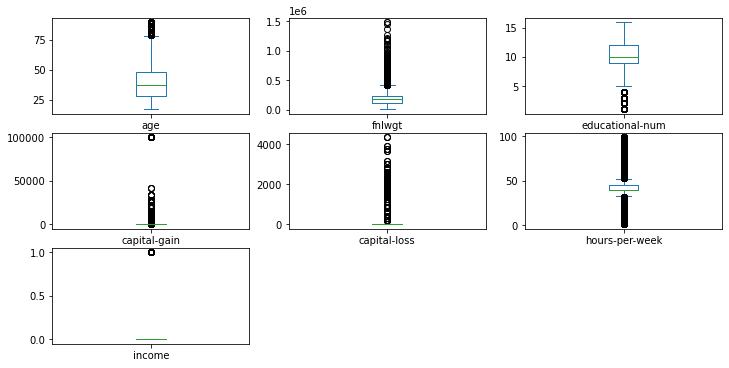

In [109]:
df.plot(kind='box',sharex=False,subplots=True,layout=(3,3),figsize=(12,6))

In [110]:
px.pie(df, values='educational-num', names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

<AxesSubplot:xlabel='race', ylabel='count'>

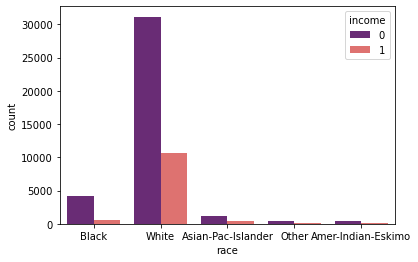

In [111]:
sns.countplot(df['race'],hue='income',data=df,palette='magma')

# MODEL BUILDING

In [112]:
## CREATE X AND Y VARIABLES
X=df.drop(['income'],axis=1)
y= df['income']

In [113]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [114]:
## convert data into machine readable format, fit and transform data
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,8,6,0,6,3,2,1,0,0,39,38,0
1,21,3,4212,6,8,1,4,0,4,1,0,0,49,38,0
2,11,1,25340,7,11,1,10,0,4,1,0,0,39,38,1
3,27,3,11201,5,9,1,6,0,2,1,98,0,39,38,1
4,1,3,5411,5,9,0,9,3,4,0,0,0,29,38,0


In [115]:
# fit the dat
scaler=StandardScaler().fit(df1.drop('income',axis=1))


In [116]:
#transform data
x=scaler.transform(df1.drop('income',axis=1))
y=df['income']

#  Fitting data into classification models

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import acccuracy_store, classification_report,confusion_matrix()

In [176]:
dt=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
lg=LogisticRegression()

In [177]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
for i in [dt,svc,gnb,knn,lg]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.01:
        print (i)
        print('Accuracy score for train data',accuracy_score(y_test,pred))
        print('Accuracy score for train data',accuracy_score(y_train,i.predict(x_train)))
        print(classification_report(y_test,pred))
        print(confusion_matrix(y_test,pred))
        print('-----------------------------------------')

SVC()
Accuracy score for train data 0.8558754187864499
Accuracy score for train data 0.8532881065884366
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12316
           1       0.78      0.54      0.64      3802

    accuracy                           0.86     16118
   macro avg       0.82      0.75      0.78     16118
weighted avg       0.85      0.86      0.85     16118

[[11727   589]
 [ 1734  2068]]
-----------------------------------------
GaussianNB()
Accuracy score for train data 0.8291351284278446
Accuracy score for train data 0.8214765921036548
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12316
           1       0.68      0.53      0.59      3802

    accuracy                           0.83     16118
   macro avg       0.77      0.72      0.74     16118
weighted avg       0.82      0.83      0.82     16118

[[11364   952]
 [ 1802  2000]]
---------------------------

We achieve the best result using 'Support Vector Classifier' which provides an 85% accuracy on test data

# Cross Validation

In [174]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()



In [178]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
for i in [rfc,ad,gd]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.01:
        print (i)
        print('Accuracy score for train data',accuracy_score(y_test,pred))
        print('Accuracy score for train data',accuracy_score(y_train,i.predict(x_train)))
        print(classification_report(y_test,pred))
        print(confusion_matrix(y_test,pred))
        print('-----------------------------------------')


AdaBoostClassifier()
Accuracy score for train data 0.8664226330810274
Accuracy score for train data 0.8596442977631097
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12316
           1       0.78      0.61      0.68      3802

    accuracy                           0.87     16118
   macro avg       0.83      0.78      0.80     16118
weighted avg       0.86      0.87      0.86     16118

[[11648   668]
 [ 1485  2317]]
-----------------------------------------
GradientBoostingClassifier()
Accuracy score for train data 0.8718203251023701
Accuracy score for train data 0.8648698203153649
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12316
           1       0.80      0.60      0.69      3802

    accuracy                           0.87     16118
   macro avg       0.84      0.78      0.80     16118
weighted avg       0.87      0.87      0.87     16118

[[11753   563]
 [ 1503  229

We see that the Gradient Boosting Classifier gives us an accuracy of ~87%
(higher than SVC), and the f1-score, recall and precision scores also improve. 
Hence we choose ‘Gradient boosting classifier’ as our final model

# Hypertuning the model

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
params={'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2],
       'min_samples_split':[2,3],'n_estimators':[10,50,100]}

In [196]:
gcv=GridSearchCV(gd,params)

In [201]:
res=gcv.fit(x_train,y_train)

In [202]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

We receive the best params for our model, which result in a best score of 87.7%.
We increased our model accuracy by 1% using hypertuning.

# AUC ROC curve
AUC — ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. 
Higher the AUC, the better the model is at predicting 0’s as 0’s and 1’s as 1’s.

In [204]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

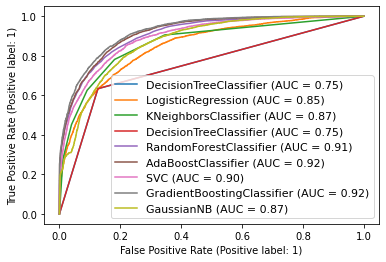

In [208]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lg,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gd,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')